Для сведения к бинарной классификации можно разбить на два класса: Никогда не использовавшиеся и использовавшиеся более десяти лет назад помещаются в класс, а все остальные в другую.





In [2]:
# импортируем нужные нам библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,4)
import seaborn as sns

In [46]:
features  = ['id', 'Age', 'Gender', 'Educ', 'Cntry', 'Ethn', 
             'NS', 'ES', 'OS', 'AS', 'CS', 'Imp', 'SS',
             'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Choco',
             'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LegalH', 'LSD', 'Meth',
             'Shrooms', 'Nicotine', 'Semer', 'VSA']

use_classes = [
    'CL0',  # Никогда не употреблял
    'CL1',  # Употреблял более десяти лет назад
    'CL2',  # Использовалось в последнее десятилетие
    'CL3',  # Использовалось в прошлом году
    'CL4',  # Использовалось в прошлом месяце
    'CL5',  # Использовалось в прошлом неделю
    'CL6'   # Использовалось недавно на днях    
]
# /home/slam/Documents/PetProjects/Drug consumption Data Set/data/drug_consumption.data
df = pd.read_csv('../data/drug_consumption.data', sep=',', names=features, index_col='id', skipinitialspace=True)

In [31]:
df.reset_index(inplace=True)
df.drop("id", axis=1, inplace=True)

In [32]:
df.tail()

,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,CS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


In [33]:
df.tail()

,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,CS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1884,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,0.41594,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


## Графики

In [34]:
from graphs import plot_counts, plot_hisplot

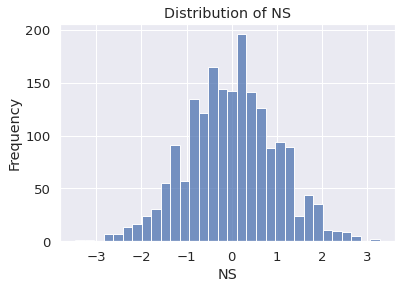

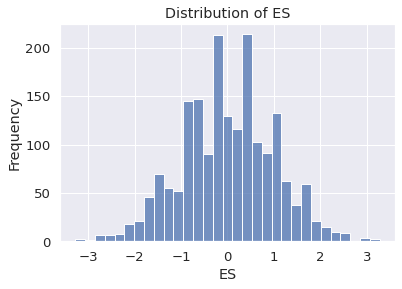

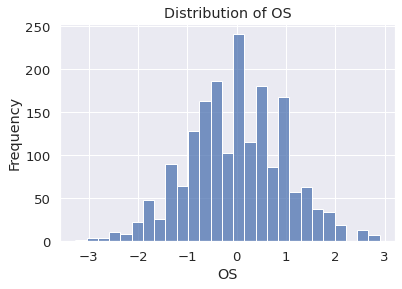

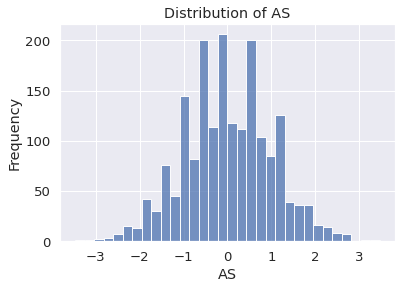

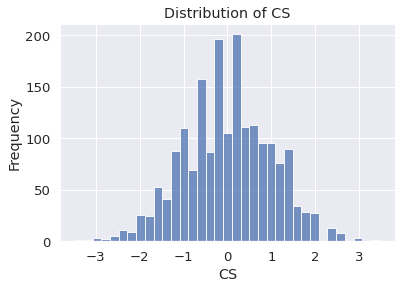

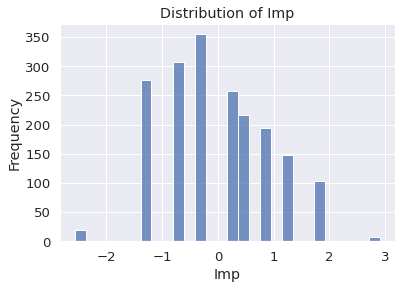

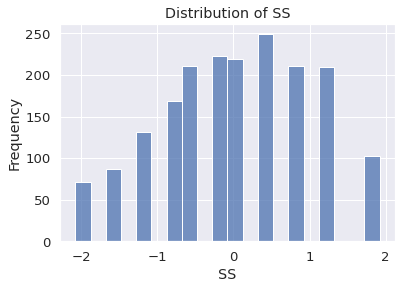

In [35]:
# С помощью функции plot_displot строим графики для опросов и смотрим распределение для каждого
lables = ['NS', 'ES', 'OS', 'AS', 'CS', 'Imp', 'SS']
plot_hisplot(df, lables)

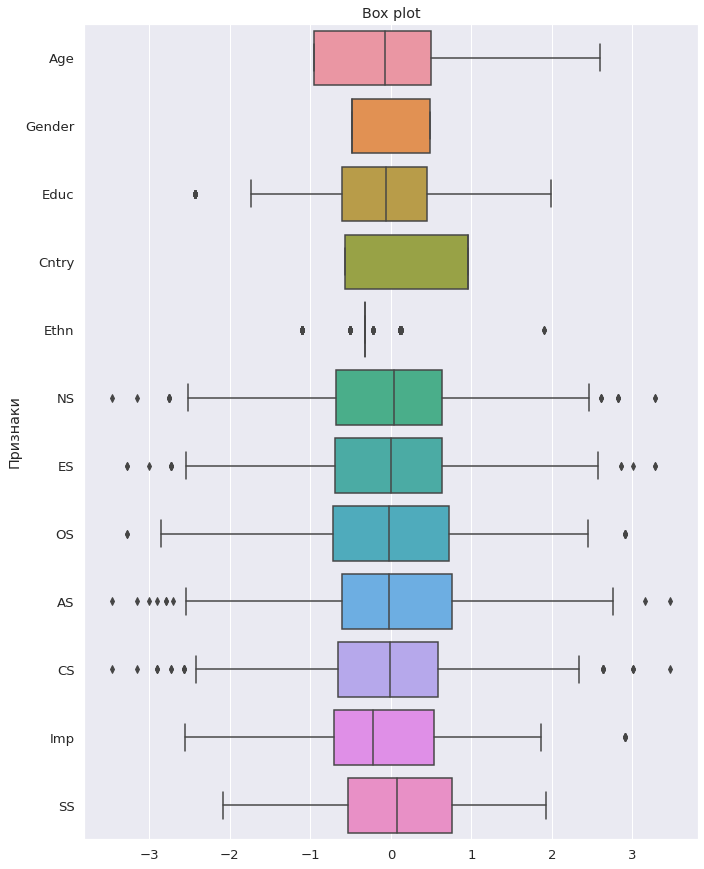

In [36]:
# Строим ящики с усами для фичей
fig, ax = plt.subplots(figsize=(11,15))
plt.ylabel('Признаки')
plt.title('Box plot')
ax = sns.boxplot(data = df, orient='h')
sns.reset_orig()

Данные отцентрированы вокруг нуля и отмаштабированы с небольшим стандартным отклонением. 

In [37]:
cntry = df['Cntry'].unique()
ethn = df['Ethn'].unique() 
educ = df['Educ'].unique()
age = np.sort(df['Age'].unique().tolist())

In [38]:
# Меняем пол с float значений на 1, если -0.48246, а на 0, если 0.48246
df['Gender'] = df['Gender'].map({df['Gender'].unique()[0]: 0, df['Gender'].unique()[1]: 1})

# Меняем возраст как указано в UCI к датасету
df['Age'] = df['Age'].map({age[0]: '18-24',
                           age[1]: '25-34',
                           age[2]: '35-44',
                           age[3]: '45-54',
                           age[4]: '55-64',
                           age[5]: '65+'})

# Перекодируем обратно значения стран 
df['Cntry'] = df['Cntry'].map({cntry[0]: 'UK',
                               cntry[1]: 'CAN',
                               cntry[2]: 'USA',
                               cntry[3]: 'Other',
                               cntry[4]: 'AUS',
                               cntry[5]: 'IRE',
                               cntry[6]: 'NZ'})
# Перекодируем обратно значения этносов 
df['Ethn'] = df['Ethn'].map({ethn[0]: 'Mixed-White/Asian',
                             ethn[1]: 'White',
                             ethn[2]: 'Other',
                             ethn[3]: 'Mixed-White/Black',
                             ethn[4]: 'Asian',
                             ethn[5]: 'Black',
                             ethn[6]: 'Mixed-Black/Asian'})

# Перекодируем обратно значения уровня образования 
df['Educ'] = df['Educ'].map({educ[0]: 'prof cert/diploma',
                             educ[1]: 'PhD',
                             educ[2]: 'Ms degree',
                             educ[3]: 'Left schl at 18',
                             educ[4]: 'Left schl at 16',
                             educ[5]: 'univ degree',
                             educ[6]: 'some clg or univ, no certificate or degree',
                             educ[7]: 'Left schl before 16',
                             educ[6]: 'Left schl at 17'})

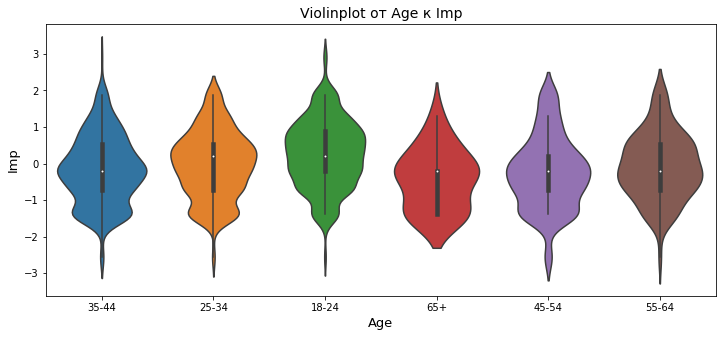

In [39]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Age', y='Imp', data=df)
plt.title('Violinplot от Age к Imp',fontsize=14)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Imp',fontsize=13)
plt.show()

In [40]:
df.head()

,Age,Gender,Educ,Cntry,Ethn,NS,ES,OS,AS,CS,...,Ecstasy,Heroin,Ketamine,LegalH,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,35-44,0,prof cert/diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,1,PhD,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,1,prof cert/diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,0,Ms degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,0,PhD,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Посмотрим количество уникальных значений.


/home/slam/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


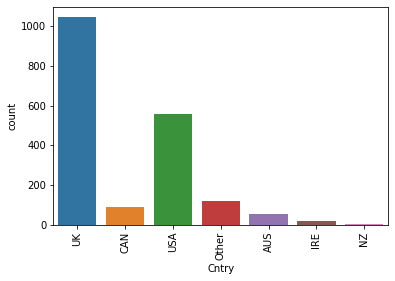

/home/slam/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


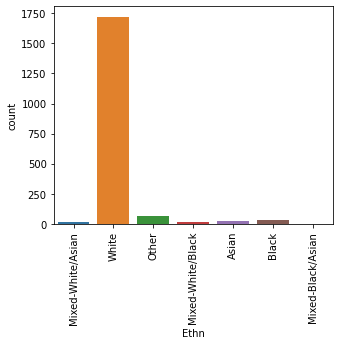

/home/slam/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


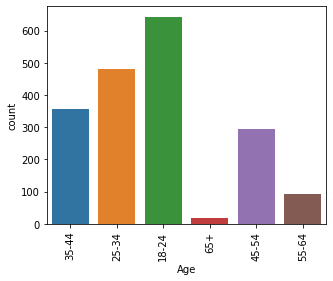

/home/slam/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


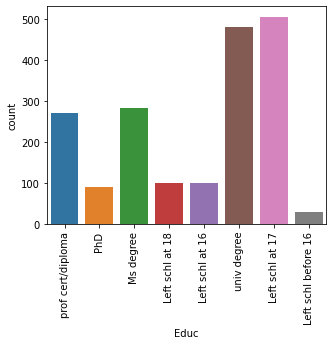

In [41]:
plot_counts(df, ['Cntry', 'Ethn', 'Age', 'Educ'])

Замечаем, что категории white в этносе значительно больше и зачительное малое количество людей в возрасте 65+. Большое количество данных наблюдаем для людей из стран категория UK, USA значительно больше других.

In [42]:
df.describe()

,Gender,NS,ES,OS,AS,CS,Imp,SS
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.500265,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.500133,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,0.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,1.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1.000000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Смотрим на стандартное отклонение.

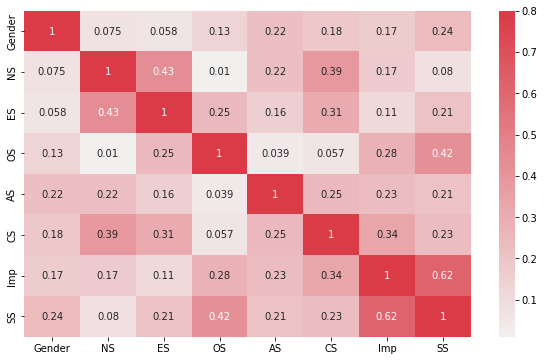

In [43]:
# Рисуем матрицу корреляций
corr = abs(df.loc[:, "Age":"SS"].corr())
plt.subplots(figsize=(10, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True)
plt.show()

Оценка импульсивности коррелирует с фиктивным веществом поэтому его не включаем в данные. Если коррреляция выше значения 0.6 удаляем.

Сохраняем измененые данные для обучения моделей

In [44]:
df.to_csv('../data/data_preprocessed.csv', index_label=False)